**Q1(40 points) Using any library, Perform any three clustering modelling and one Gaussian based clustering modelling and report the following for each model.                                                                         1.Centroid/representative object/prototype of each cluster for every model.                                                                         2.Visualization of the clusters.(You can use lesser data points/ dimensions for visualizations).                                                               3.Compare your cluster distribution with the true label count.                 4.Compare the cluster formation of the gaussian based method with the other three clustering methods and report your observations on the results.**

**Importing Pre-Requisite Libraries, Checking dataset size, Dropping duplicate rows**

In [127]:
#Downloading Pre-requisite library
!pip install fuzzy-c-means

In [157]:
#Import Pre-requisite libraries
import warnings
import numpy as np
%matplotlib inline
import pandas as pd
from fcmeans import FCM
from numpy import asarray
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import OrdinalEncoder
from sklearn.cluster import AgglomerativeClustering
from sklearn.model_selection import train_test_split
from scipy.cluster.vq import whiten, kmeans, vq, kmeans2
from sklearn.feature_selection import mutual_info_classif

In [158]:
#ignoring warning messages if occur
warnings.filterwarnings("ignore")

In [159]:
#importing dataset
df=pd.read_csv('/content/drive/MyDrive/DMG ASSIGNMENT 3/covtype_train.csv')

In [160]:
#displaying number of rows and columns in dataset
df.shape

(406708, 11)

In [161]:
#Checking Duplicates
df.duplicated().sum()

394213

In [162]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [163]:
#displaying number of rows and columns in dataset
df.shape

(12495, 11)

In [164]:
#displaying top 5 rows of dataframe
df.head()

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,target
0,elevation_medium,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,0,1,low,22,0,2
1,elevation_high,aspect_medium,slope_low,hillshade_9am_max,hillnoon_max,1,1,mid,32,2,1
2,elevation_medium,aspect_low,slope_low,hillshade_9am_max,hillnoon_max,1,1,low,10,2,2
3,elevation_high,aspect_ultra,slope_medium,hillshade_9am_max,hillnoon_max,2,1,low,23,2,1
4,elevation_high,aspect_high,slope_low,hillshade_9am_max,hillnoon_max,2,1,mid,28,0,2


**Ordinal Encoding to convert string categorical features to ordinal features**

In [165]:
#ordinal encoding of string categorical features
l=asarray(df['Elevation'])
l1=np.reshape(l,(len(l),1))
enc = OrdinalEncoder()
enc.fit(l1)
result = enc.fit_transform(l1)
for x in range(len(result)):
  result[x]=int(result[x])
df['Elevation']=result
df['Elevation'] = df['Elevation'].astype(int)

In [166]:
l=asarray(df['Aspect'])
l1=np.reshape(l,(len(l),1))
enc = OrdinalEncoder()
enc.fit(l1)
result = enc.fit_transform(l1)
for x in range(len(result)):
  result[x]=int(result[x])
df['Aspect']=result
df['Aspect'] = df['Aspect'].astype(int)

In [167]:
l=asarray(df['Slope'])
l1=np.reshape(l,(len(l),1))
enc = OrdinalEncoder()
enc.fit(l1)
result = enc.fit_transform(l1)
for x in range(len(result)):
  result[x]=int(result[x])
df['Slope']=result
df['Slope'] = df['Slope'].astype(int)

In [168]:
l=asarray(df['Hillshade_9am'])
l1=np.reshape(l,(len(l),1))
enc = OrdinalEncoder()
enc.fit(l1)
result = enc.fit_transform(l1)
for x in range(len(result)):
  result[x]=int(result[x])
df['Hillshade_9am']=result
df['Hillshade_9am'] = df['Hillshade_9am'].astype(int)

In [169]:
l=asarray(df['Hillshade_Noon'])
l1=np.reshape(l,(len(l),1))
enc = OrdinalEncoder()
enc.fit(l1)
result = enc.fit_transform(l1)
for x in range(len(result)):
  result[x]=int(result[x])
df['Hillshade_Noon']=result
df['Hillshade_Noon'] = df['Hillshade_Noon'].astype(int)

In [170]:
l=asarray(df['Horizontal_Distance_To_Fire_Points'])
l1=np.reshape(l,(len(l),1))
enc = OrdinalEncoder()
enc.fit(l1)
result = enc.fit_transform(l1)
for x in range(len(result)):
  result[x]=int(result[x])
df['Horizontal_Distance_To_Fire_Points']=result
df['Horizontal_Distance_To_Fire_Points'] = df['Horizontal_Distance_To_Fire_Points'].astype(int)

In [171]:
#displaying dataframe after performing ordinal encoding of all categorical columns
df.head()

,Elevation,Aspect,Slope,Hillshade_9am,Hillshade_Noon,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Fire_Points,Soil_Type,Wilderness,target
0,2,2,1,0,0,0,1,1,22,0,2
1,0,2,1,0,0,1,1,2,32,2,1
2,2,1,1,0,0,1,1,1,10,2,2
3,0,3,2,0,0,2,1,1,23,2,1
4,0,0,1,0,0,2,1,2,28,0,2


**Feature Selection**

In [172]:
#separating input and target columns
properties = list(df.columns.values)
properties.remove('target')
X = df[properties]
y = df['target']

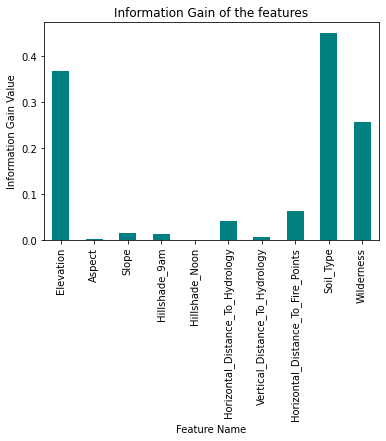

In [173]:
#Evaluating and plotting information gain of each input feature
imp=mutual_info_classif(X, y)
featImp=pd.Series(imp,df.columns[0:len(df.columns)-1])
featImp.plot(kind='bar',color='teal')
plt.title('Information Gain of the features')
plt.xlabel('Feature Name')
plt.ylabel('Information Gain Value')
plt.show()

In [174]:
#Dropping feature which have less than 0.1 information gain
featureNames=list(df.columns)
importantFeatures=list()
for i in range(len(imp)):
  if(imp[i]>0.1):
    importantFeatures.append(featureNames[i])

In [175]:
#Displaying features with information gain > 0.1
importantFeatures

['Elevation', 'Soil_Type', 'Wilderness']

In [176]:
#Creating dataframe which contains above features
df2=df[importantFeatures]

In [177]:
#Displaying dataframe that contains features with information gain >0.1
df2

,Elevation,Soil_Type,Wilderness
0,2,22,0
1,0,32,2
2,2,10,2
3,0,23,2
4,0,28,0
...,...,...,...
405630,0,3,2
405688,2,19,0
405828,0,28,0
405883,1,2,2


**Performing TSNE(T-distributed Stochastic Neighbor Embedding)**

In [178]:
# normalize the values of all input features present in the df2 dataframe
X = whiten(df2)

In [179]:
#TSNE will reduce the number of features to two
from sklearn.manifold import TSNE
c_tsne = TSNE(n_components=2).fit_transform(X)
c_tsne=pd.DataFrame(c_tsne)

In [180]:
#Displaying dataframe created by TSNE that contains two features
print("0: Feature one created by TSNE")
print("1: Feature two created by TSNE")
c_tsne

0: Feature one created by TSNE
1: Feature two created by TSNE


,0,1
0,-48.138676,-44.149132
1,-3.570309,-21.123844
2,39.193378,9.932304
3,-11.184786,-44.345562
4,-11.612286,2.193435
...,...,...
12490,55.748947,59.625298
12491,-5.976393,71.234589
12492,-13.101115,3.765721
12493,-16.816324,-70.920181


**Implementing K-Means Algorithm**

In [181]:
#Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(c_tsne, y, test_size=0.2,random_state=9)

In [182]:
#Reseting index
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [183]:
#Displaying number of training and testing instances
print("Number of instances in Training dataset:",len(X_train.index))
print("Number of instances in Testing dataset: ",len(X_test.index))

Number of instances in Training dataset: 9996
Number of instances in Testing dataset:  2499


In [197]:
#Creating K-Means Model and training on train dataset
kmeans = KMeans(n_clusters= 7,random_state=8)
clustersTrain = kmeans.fit_predict(X_train)
clustersTest  = kmeans.predict(X_test)
centroids = kmeans.cluster_centers_
centroids=pd.DataFrame(centroids)

In [198]:
#Displaying all the unique values of cluster numbers predicted
uniqueClusters=[]
for x in clustersTrain:
  if x not in uniqueClusters:
    uniqueClusters.append(x)
uniqueClusters

[1, 0, 5, 6, 2, 3, 4]

In [199]:
#Displaying cluster number with the number of instances predicted that value of cluster
print("Cluster Predicted",":","Number of instances")
for x in range(0,7):
  print("\t",x,"\t\t",list(clustersTrain).count(x))

Cluster Predicted : Number of instances
	 0 		 1485
	 1 		 1106
	 2 		 1909
	 3 		 1256
	 4 		 1243
	 5 		 1511
	 6 		 1486


In [200]:
#fetching true labels of all the instances of training dataset
trueLabelsTrain=y_train
uniqueTrueLabelsTrain =np.array(trueLabelsTrain)
trueLabelsTrain=trueLabelsTrain.to_list()

In [201]:
#Displaying unique true lables values
print("Unique values of True label:",np.unique(uniqueTrueLabelsTrain))

Unique values of True label: [1 2 3 4 5 6 7]


In [202]:
#function to find most frequent element in the list
def most_frequent(List):
    return max(set(List), key = List.count)

In [203]:
#Creating function "findMajorityLabels" that returns dictionary "majorityLabels" that will contain majority true label for each cluster
#In the dictionary "majorityLabels", key will be cluster and value will be its majority label
def findMajorityLabels(clustersTrain,trueLabelsTrain):
  majorityLabels={}
  for eachClusterValue in range(0,7):
    trueLabeslListForCurrentCluster=[]
    for eachClusterNumber in range(len(clustersTrain)):
      if clustersTrain[eachClusterNumber]==eachClusterValue:
        trueLabeslListForCurrentCluster.append(trueLabelsTrain[eachClusterNumber])
    majorityLabel=most_frequent(trueLabeslListForCurrentCluster)
    majorityLabels[eachClusterValue]=majorityLabel
  return majorityLabels

In [204]:
#creating dataframe for the storing cluster with its majority true label
majorityLabelDataframe=pd.DataFrame(columns=['Cluster Number','Majority Label'])
for clusterNumber,majorityLabel in majorityLabels.items():
  majorityLabelDataframe.loc[len(majorityLabelDataframe.index)] = [clusterNumber,majorityLabel] 

In [205]:
#displaying majorityLabelDataframe
majorityLabelDataframe

,Cluster Number,Majority Label
0,0,2
1,1,2
2,2,2
3,3,2
4,4,1
5,5,2
6,6,2


In [206]:
#Finding corresponding true label for the training instances using predicted cluster 
predictedTrueLabelTrain=[]
for eachCluster in clustersTrain:
  predictedTrueLabelTrain.append(majorityLabels[eachCluster])

In [207]:
#Evaluating and displaying F1 score on the training instances
f1ScoreTrain=f1_score(predictedTrueLabelTrain, y_train,average='weighted')
print("F1 score on Training instances: ",f1ScoreTrain,"=","{0:.2f}".format(f1ScoreTrain*100),"%")  

F1 score on Training instances:  0.4772368665146889 = 47.72 %


In [208]:
#Finding corresponding true label for the testing instances using predicted cluster 
predictedTrueLabelTest=[]
for eachCluster in clustersTest:
  predictedTrueLabelTest.append(majorityLabels[eachCluster])

In [209]:
#Evaluating and displaying F1 score on the testing instances
f1ScoreTest=f1_score(predictedTrueLabelTest, y_test,average='weighted')
print("F1 score on Testing instances: ",f1ScoreTest,"=","{0:.2f}".format(f1ScoreTest*100),"%") 

F1 score on Testing instances:  0.45452274789295827 = 45.45 %


In [210]:
#Evaluating and storing frequency of instances of each True label
trueLabelsCount=[0,0,0,0,0,0,0]
for eachTrueLabel in y:
  trueLabelsCount[eachTrueLabel-1]=trueLabelsCount[eachTrueLabel-1]+1
print("True Label","  ","Number of Instances")
for eachTrueLabelValue in range(1,8):
  print(eachTrueLabelValue,"\t\t",trueLabelsCount[eachTrueLabelValue-1])

True Label    Number of Instances
1 		 4112
2 		 4711
3 		 1056
4 		 175
5 		 597
6 		 686
7 		 1158


In [211]:
#Evaluating the each true label count in each cluster
def ClusterTrueLabelCount(clusters,trueLabels):
  ClusterTrueLabelCounts=[]
  for eachClusterValue in range(0,7):
    trueLabeslListForCurrentCluster=[]
    for eachClusterNumber in range(len(clusters)):
      if clusters[eachClusterNumber]==eachClusterValue:
        trueLabeslListForCurrentCluster.append(trueLabels[eachClusterNumber])
    counts=[]
    for value in range(1,8):
      counts.append(trueLabeslListForCurrentCluster.count(value))
    ClusterTrueLabelCounts.append(counts)
  return ClusterTrueLabelCounts

In [212]:
#Comparison between true label counts in dataset and in individual cluster for each true label
clustersTrainList=clustersTrain.tolist()
clustersTestList=clustersTest.tolist()

clustersTrainList.extend(clustersTestList)
clustersCombined=clustersTrainList

trueLabelsTrain=y_train.to_list()
trueLabelsTest=y_test.to_list()
trueLabelsTrain.extend(trueLabelsTest)
trueLabelsCombined=trueLabelsTrain
l3=ClusterTrueLabelCount(clustersCombined,trueLabelsCombined)

df4=pd.DataFrame(l3)
df4=df4.T
df4 = df4.rename(columns={0:'Cluster 0 Count',1:'Cluster 1 Count',2:'Cluster 2 Count',3:'Cluster 3 Count',4:'Cluster 4 Count',5:'Cluster 5 Count',6:'Cluster 6 Count'})
df4['True Label']=[1,2,3,4,5,6,7]
df4.set_index('True Label',drop=True,inplace=True)
maxValuesOccured=df4.max(axis=1)
clusterNumberMaxValue=list(df4.idxmax(axis=1))
for q in range(len(clusterNumberMaxValue)):
  clusterNumberMaxValue[q]=clusterNumberMaxValue[q].replace('Count','')
df4['True Label Count']=trueLabelsCount
df4['Maximum Label Count Occured Together']=maxValuesOccured
df4['Cluster Number']=clusterNumberMaxValue
df4

,Cluster 0 Count,Cluster 1 Count,Cluster 2 Count,Cluster 3 Count,Cluster 4 Count,Cluster 5 Count,Cluster 6 Count,True Label Count,Maximum Label Count Occured Together,Cluster Number
True Label,,,,,,,,,,
1,563,252,940,569,322,821,645,4112,940,Cluster 2
2,849,475,1060,505,611,850,361,4711,1060,Cluster 2
3,151,313,2,122,186,16,266,1056,313,Cluster 1
4,17,70,0,0,32,0,56,175,70,Cluster 1
5,98,103,106,92,124,61,13,597,124,Cluster 4
6,136,156,0,67,130,38,159,686,159,Cluster 6
7,53,39,249,200,176,118,323,1158,323,Cluster 6


In [241]:
#Displaying centroids
def displayCentroids(centroids):
  if(type(centroids) != list):
    centroids=centroids.to_numpy()
    centroids=centroids.tolist()
  centroidDataFrame=pd.DataFrame(centroids)
  centroidDataFrame['Cluster']=[0,1,2,3,4,5,6]
  centroidDataFrame = centroidDataFrame.rename(columns={0:'X Co-ordinate',1:'Y Co-ordinate'})
  centroidDataFrame.set_index('Cluster',drop=True,inplace=True)
  print(centroidDataFrame)

In [215]:
#Displaying cluster co-ordinates
displayCentroids(centroids)

         X Co-ordinate  Y Co-ordinate
Cluster                              
0           -51.279434      20.063602
1            44.072403      30.432362
2             1.550024      -4.080041
3           -41.872391     -31.963842
4            56.723030     -17.274429
5            -4.055102      54.389763
6             9.344375     -58.637558


Note: Cluster Centroids are represented by Black Markers


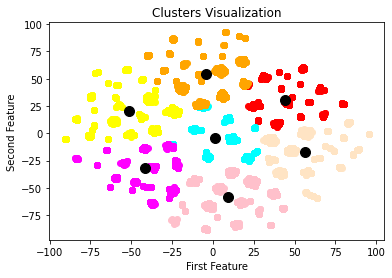

In [214]:
#Visualization of clusters

#"XCombined" will store all training instances and all testing instances appended at the end of training instances
XCombined=X_train.append(X_test)

#"CombinedTrueClusters" will store all predicted clusters of training instances and all predicted clusters of testing append at end of training instances
trainClusters=clustersTrain.tolist()
testClusters=clustersTest.tolist()
trainClusters.extend(testClusters)
CombinedTrueClusters=trainClusters

#Adding predicted cluster column to the Xcombined datframe
XCombined['Cluster Predicted']=CombinedTrueClusters

#Filter rows of original data cluster wise
filtered_label0 = XCombined.loc[XCombined['Cluster Predicted'] == 0]
filtered_label1 = XCombined.loc[XCombined['Cluster Predicted'] == 1]
filtered_label2 = XCombined.loc[XCombined['Cluster Predicted'] == 2]
filtered_label3 = XCombined.loc[XCombined['Cluster Predicted'] == 3]
filtered_label4 = XCombined.loc[XCombined['Cluster Predicted'] == 4]
filtered_label5 = XCombined.loc[XCombined['Cluster Predicted'] == 5]
filtered_label6 = XCombined.loc[XCombined['Cluster Predicted'] == 6]

#Plotting the instances cluster wise
plt.scatter(filtered_label0.loc[:,0] , filtered_label0.loc[:,1] , color = 'yellow')
plt.scatter(filtered_label1.loc[:,0] , filtered_label1.loc[:,1] , color = 'red')
plt.scatter(filtered_label2.loc[:,0] , filtered_label2.loc[:,1] , color = 'cyan')
plt.scatter(filtered_label3.loc[:,0] , filtered_label3.loc[:,1] , color = 'magenta')
plt.scatter(filtered_label4.loc[:,0] , filtered_label4.loc[:,1] , color = 'bisque')
plt.scatter(filtered_label5.loc[:,0] , filtered_label5.loc[:,1] , color = 'orange')
plt.scatter(filtered_label6.loc[:,0] , filtered_label6.loc[:,1] , color = 'pink')
plt.scatter(centroids.loc[:,0] , centroids.loc[:,1] , color = 'black',s=100)
plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.title("Clusters Visualization")
print("Note: Cluster Centroids are represented by Black Markers")
plt.show()

 **Implementing BIRCH(Balanced Iterative Reducing and Clustering using Hierarchies) algorithm**

In [216]:
# Import required libraries and modules
import matplotlib.pyplot as plt
from sklearn.cluster import Birch

# Creating the BIRCH clustering model
model = Birch(branching_factor = 30, n_clusters = 7, threshold = 2)

# Fit the data (Training)
model.fit(X_train)

# Predict the same data

clustersTrain = model.predict(X_train)
clustersTest = model.predict(X_test)

In [217]:
#Evaluation Majoirty labels for each cluster predicted
maojorityLabels=findMajorityLabels(clustersTrain,y_train)

In [218]:
#creating dataframe for the storing cluster with its majority true label
majorityLabelDataframe=pd.DataFrame(columns=['Cluster Number','Majority Label'])
for clusterNumber,majorityLabel in majorityLabels.items():
  majorityLabelDataframe.loc[len(majorityLabelDataframe.index)] = [clusterNumber,majorityLabel] 

In [219]:
#displaying majorityLabelDataframe
majorityLabelDataframe

,Cluster Number,Majority Label
0,0,2
1,1,2
2,2,2
3,3,2
4,4,1
5,5,2
6,6,2


In [220]:
#Finding corresponding true label for the training instances using predicted cluster 
predictedTrueLabelTrain=[]
for eachCluster in clustersTrain:
  predictedTrueLabelTrain.append(majorityLabels[eachCluster])

In [221]:
#Evaluating and displaying F1 score on the training instances
f1ScoreTrain=f1_score(predictedTrueLabelTrain, y_train,average='micro')
print("F1 score on Training instances: ",f1ScoreTrain,"=","{0:.2f}".format(f1ScoreTrain*100),"%")  

F1 score on Training instances:  0.37765106042416974 = 37.77 %


In [222]:
#Finding corresponding true label for the testing instances using predicted cluster
predictedTrueLabelTest=[]
for eachCluster in clustersTest:
  predictedTrueLabelTest.append(majorityLabels[eachCluster])

In [223]:
#Evaluating and displaying F1 score on the testing instances
f1ScoreTest=f1_score(predictedTrueLabelTest, y_test,average='weighted')
print("F1 score on Testing instances: ",f1ScoreTest,"=","{0:.2f}".format(f1ScoreTest*100),"%") 

F1 score on Testing instances:  0.473431376687084 = 47.34 %


In [225]:
#Comparison between true label counts in dataset and in individual cluster for each true label
clustersTrainList=clustersTrain.tolist()
clustersTestList=clustersTest.tolist()

clustersTrainList.extend(clustersTestList)
clustersCombined=clustersTrainList

trueLabelsTrain=y_train.to_list()
trueLabelsTest=y_test.to_list()
trueLabelsTrain.extend(trueLabelsTest)
trueLabelsCombined=trueLabelsTrain
l3=ClusterTrueLabelCount(clustersCombined,trueLabelsCombined)

df4=pd.DataFrame(l3)
df4=df4.T
df4 = df4.rename(columns={0:'Cluster 0 Count',1:'Cluster 1 Count',2:'Cluster 2 Count',3:'Cluster 3 Count',4:'Cluster 4 Count',5:'Cluster 5 Count',6:'Cluster 6 Count'})
df4['True Label']=[1,2,3,4,5,6,7]
df4.set_index('True Label',drop=True,inplace=True)
maxValuesOccured=df4.max(axis=1)
clusterNumberMaxValue=list(df4.idxmax(axis=1))
for q in range(len(clusterNumberMaxValue)):
  clusterNumberMaxValue[q]=clusterNumberMaxValue[q].replace('Count','')
df4['True Label Count']=trueLabelsCount
df4['Maximum Label Count Occured Together']=maxValuesOccured
df4['Cluster Number']=clusterNumberMaxValue
df4

,Cluster 0 Count,Cluster 1 Count,Cluster 2 Count,Cluster 3 Count,Cluster 4 Count,Cluster 5 Count,Cluster 6 Count,True Label Count,Maximum Label Count Occured Together,Cluster Number
True Label,,,,,,,,,,
1,1099,348,320,1010,793,356,186,4112,1099,Cluster 0
2,1376,617,522,743,789,409,255,4711,1376,Cluster 0
3,106,267,46,266,170,15,186,1056,267,Cluster 1
4,0,66,0,56,17,0,36,175,66,Cluster 1
5,154,124,112,36,123,23,25,597,154,Cluster 0
6,125,181,18,159,108,8,87,686,181,Cluster 1
7,161,190,143,410,173,59,22,1158,410,Cluster 3


Note: Cluster Centroids are represented by Black Markers


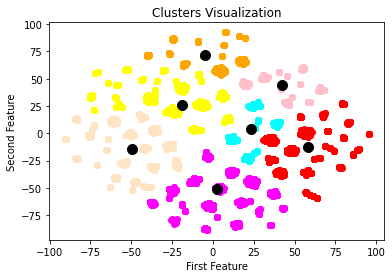

In [226]:
#Visualization of clusters

#"XCombined" will store all training instances and all testing instances appended at the end of training instances
XCombined=X_train.append(X_test)

#"CombinedTrueClusters" will store all predicted clusters of training instances and all predicted clusters of testing append at end of training instances
trainClusters=clustersTrain.tolist()
testClusters=clustersTest.tolist()
trainClusters.extend(testClusters)
CombinedTrueClusters=trainClusters

#Adding predicted cluster column to the Xcombined datframe
XCombined['Cluster Predicted']=CombinedTrueClusters

#Filter rows of original data cluster wise
filtered_label0 = XCombined.loc[XCombined['Cluster Predicted'] == 0]
filtered_label1 = XCombined.loc[XCombined['Cluster Predicted'] == 1]
filtered_label2 = XCombined.loc[XCombined['Cluster Predicted'] == 2]
filtered_label3 = XCombined.loc[XCombined['Cluster Predicted'] == 3]
filtered_label4 = XCombined.loc[XCombined['Cluster Predicted'] == 4]
filtered_label5 = XCombined.loc[XCombined['Cluster Predicted'] == 5]
filtered_label6 = XCombined.loc[XCombined['Cluster Predicted'] == 6]

#Evaluating centroids of each cluster
centroidList=[]
l0=filtered_label0.mean(axis=0)
centroidList.append([l0[0],l0[1]])

l1=filtered_label1.mean(axis=0)
centroidList.append(list([l1[0],l1[1]]))

l2=filtered_label2.mean(axis=0)
centroidList.append(list([l2[0],l2[1]]))

l3=filtered_label3.mean(axis=0)
centroidList.append(list([l3[0],l3[1]]))

l4=filtered_label4.mean(axis=0)
centroidList.append(list([l4[0],l4[1]]))

l5=filtered_label5.mean(axis=0)
centroidList.append(list([l5[0],l5[1]]))

l6=filtered_label6.mean(axis=0)
centroidList.append(list([l6[0],l6[1]]))

#Plotting the instances cluster wise
plt.scatter(filtered_label0.loc[:,0] , filtered_label0.loc[:,1] , color = 'yellow')
plt.scatter(filtered_label1.loc[:,0] , filtered_label1.loc[:,1] , color = 'red')
plt.scatter(filtered_label2.loc[:,0] , filtered_label2.loc[:,1] , color = 'cyan')
plt.scatter(filtered_label3.loc[:,0] , filtered_label3.loc[:,1] , color = 'magenta')
plt.scatter(filtered_label4.loc[:,0] , filtered_label4.loc[:,1] , color = 'bisque')
plt.scatter(filtered_label5.loc[:,0] , filtered_label5.loc[:,1] , color = 'orange')
plt.scatter(filtered_label6.loc[:,0] , filtered_label6.loc[:,1] , color = 'pink')
#plt.scatter(centroids.loc[:,0] , centroids.loc[:,1] , color = 'black',s=100)
for eachCentroid in centroidList:
  plt.scatter(eachCentroid[0] , eachCentroid[1] , color = 'black',s=100)

plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.title("Clusters Visualization")
print("Note: Cluster Centroids are represented by Black Markers")
plt.show()

In [ ]:
#Displaying cluster co-ordinates
displayCentroids(centroidList)

         X Co-ordinate  Y Co-ordinate
Cluster                              
0            30.771345     -41.749878
1           -40.122036      44.287437
2             8.121088      47.754608
3            -6.534004      -3.103943
4           -13.718952     -58.131229
5            58.309010       9.175364
6           -62.867413     -13.724172


**Implementing Fuzzy C Means Algorithm**

In [227]:
#Converting datasets to numpy array
X_train=X_train.to_numpy()
X_test=X_test.to_numpy()

In [228]:
#Creating and training model on training dataset
fcm = FCM(n_clusters=7,random_state=19)
fcm.fit(X_train)

In [229]:
#Storing centroids position and predicted clusters on training and testing instances
centroids = fcm.centers
clustersTrain = fcm.predict(X_train)
clustersTest= fcm.predict(X_test)

In [230]:
#Evaluating and storing majority label of each cluster
majorityLabels=findMajorityLabels(clustersTrain,y_train)

In [231]:
#creating dataframe for the storing cluster with its majority true label
majorityLabelDataframe=pd.DataFrame(columns=['Cluster Number','Majority Label'])
for clusterNumber,majorityLabel in majorityLabels.items():
  majorityLabelDataframe.loc[len(majorityLabelDataframe.index)] = [clusterNumber,majorityLabel] 

In [232]:
#displaying majorityLabelDataframe
majorityLabelDataframe

,Cluster Number,Majority Label
0,0,1
1,1,1
2,2,1
3,3,2
4,4,2
5,5,2
6,6,2


In [233]:
#Finding corresponding true label for the training instances using predicted cluster 
predictedTrueLabelTrain=[]
for eachCluster in clustersTrain:
  predictedTrueLabelTrain.append(majorityLabels[eachCluster])

In [234]:
#Evaluating and displaying F1 score on the training instances
f1ScoreTrain=f1_score(predictedTrueLabelTrain, y_train,average='weighted')
print("F1 score on Training instances: ",f1ScoreTrain,"=","{0:.2f}".format(f1ScoreTrain*100),"%")  

F1 score on Training instances:  0.47333974653642646 = 47.33 %


In [235]:
#Finding corresponding true label for the testing instances using predicted cluster
predictedTrueLabelTest=[]
for eachCluster in clustersTest:
  predictedTrueLabelTest.append(majorityLabels[eachCluster])

In [236]:
#Evaluating and displaying F1 score on the testing instances
f1ScoreTest=f1_score(predictedTrueLabelTest, y_test,average='weighted')
print("F1 score on Testing instances: ",f1ScoreTest,"=","{0:.2f}".format(f1ScoreTest*100),"%") 

F1 score on Testing instances:  0.47622078800264367 = 47.62 %


In [237]:
#Converting dataset to dataframe for visualization
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [238]:
#Comparison between true label counts in dataset and in individual cluster for each true label
clustersTrainList=clustersTrain.tolist()
clustersTestList=clustersTest.tolist()

clustersTrainList.extend(clustersTestList)
clustersCombined=clustersTrainList

trueLabelsTrain=y_train.to_list()
trueLabelsTest=y_test.to_list()
trueLabelsTrain.extend(trueLabelsTest)
trueLabelsCombined=trueLabelsTrain
l3=ClusterTrueLabelCount(clustersCombined,trueLabelsCombined)

df4=pd.DataFrame(l3)
df4=df4.T
df4 = df4.rename(columns={0:'Cluster 0 Count',1:'Cluster 1 Count',2:'Cluster 2 Count',3:'Cluster 3 Count',4:'Cluster 4 Count',5:'Cluster 5 Count',6:'Cluster 6 Count'})
df4['True Label']=[1,2,3,4,5,6,7]
df4.set_index('True Label',drop=True,inplace=True)
maxValuesOccured=df4.max(axis=1)
clusterNumberMaxValue=list(df4.idxmax(axis=1))
for q in range(len(clusterNumberMaxValue)):
  clusterNumberMaxValue[q]=clusterNumberMaxValue[q].replace('Count','')
df4['True Label Count']=trueLabelsCount
df4['Maximum Label Count Occured Together']=maxValuesOccured
df4['Cluster Number']=clusterNumberMaxValue
df4

,Cluster 0 Count,Cluster 1 Count,Cluster 2 Count,Cluster 3 Count,Cluster 4 Count,Cluster 5 Count,Cluster 6 Count,True Label Count,Maximum Label Count Occured Together,Cluster Number
True Label,,,,,,,,,,
1,713,891,448,438,383,598,641,4112,891,Cluster 1
2,728,681,315,744,715,638,890,4711,890,Cluster 6
3,45,0,326,323,114,122,126,1056,326,Cluster 2
4,0,0,58,73,17,0,27,175,73,Cluster 3
5,71,50,13,157,85,116,105,597,157,Cluster 3
6,47,0,210,178,106,74,71,686,210,Cluster 2
7,132,272,266,207,34,173,74,1158,272,Cluster 1


In [243]:
#Displaying cluster co-ordinates
centroidDataFrame=pd.DataFrame(centroids)
centroidDataFrame['Cluster']=[0,1,2,3,4,5,6]
centroidDataFrame = centroidDataFrame.rename(columns={0:'X Co-ordinate',1:'Y Co-ordinate'})
centroidDataFrame.set_index('Cluster',drop=True,inplace=True)
print(centroidDataFrame)

         X Co-ordinate  Y Co-ordinate
Cluster                              
0            -8.510196       7.614155
1            -1.320146     -25.274145
2            15.977232     -59.526233
3            57.039807      -0.541202
4           -42.261663      37.436065
5           -50.678274     -20.574713
6            14.390697      49.295683


Note: Cluster Centroids are represented by Black Markers


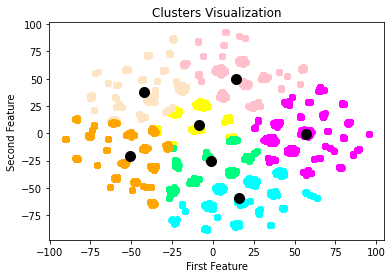

In [244]:
#Visualization of clusters

#"XCombined" will store all training instances and all testing instances appended at the end of training instances
XCombined=X_train.append(X_test)

#"CombinedTrueClusters" will store all predicted clusters of training instances and all predicted clusters of testing append at end of training instances
trainClusters=clustersTrain.tolist()
testClusters=clustersTest.tolist()
trainClusters.extend(testClusters)
CombinedTrueClusters=trainClusters

#Adding predicted cluster column to the Xcombined datframe
XCombined['Cluster Predicted']=CombinedTrueClusters

#Filter rows of original data cluster wise
filtered_label0 = XCombined.loc[XCombined['Cluster Predicted'] == 0]
filtered_label1 = XCombined.loc[XCombined['Cluster Predicted'] == 1]
filtered_label2 = XCombined.loc[XCombined['Cluster Predicted'] == 2]
filtered_label3 = XCombined.loc[XCombined['Cluster Predicted'] == 3]
filtered_label4 = XCombined.loc[XCombined['Cluster Predicted'] == 4]
filtered_label5 = XCombined.loc[XCombined['Cluster Predicted'] == 5]
filtered_label6 = XCombined.loc[XCombined['Cluster Predicted'] == 6]


#Plotting the instances cluster wise
plt.scatter(filtered_label0.loc[:,0] , filtered_label0.loc[:,1] , color = 'yellow')
plt.scatter(filtered_label1.loc[:,0] , filtered_label1.loc[:,1] , color = 'springgreen')
plt.scatter(filtered_label2.loc[:,0] , filtered_label2.loc[:,1] , color = 'cyan')
plt.scatter(filtered_label3.loc[:,0] , filtered_label3.loc[:,1] , color = 'magenta')
plt.scatter(filtered_label4.loc[:,0] , filtered_label4.loc[:,1] , color = 'bisque')
plt.scatter(filtered_label5.loc[:,0] , filtered_label5.loc[:,1] , color = 'orange')
plt.scatter(filtered_label6.loc[:,0] , filtered_label6.loc[:,1] , color = 'pink')
#plt.scatter(centroids.loc[:,0] , centroids.loc[:,1] , color = 'black',s=100)

centroids=list(centroids)
for eachCentroid in centroids:
  plt.scatter(eachCentroid[0] , eachCentroid[1], color = 'black',s=100)

plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.title("Clusters Visualization")
print("Note: Cluster Centroids are represented by Black Markers")
plt.show()

**Implementing Gaussian Mixture Clustering Algorithm**

In [111]:
#Creating and training model on training dataset
gmm = GaussianMixture(n_components = 7,random_state=5)
gmm.fit(X_train)

#Assign a label to each sample
clustersTrain = gmm.predict(X_train)
clustersTest  = gmm.predict(X_test)

In [112]:
#Evaluating and storing majority label of each cluster
majorityLabels=findMajorityLabels(clustersTrain,y_train)

In [113]:
#creating dataframe for the storing cluster with its majority true label
majorityLabelDataframe=pd.DataFrame(columns=['Cluster Number','Majority Label'])
for clusterNumber,majorityLabel in majorityLabels.items():
  majorityLabelDataframe.loc[len(majorityLabelDataframe.index)] = [clusterNumber,majorityLabel] 

In [114]:
#displaying majorityLabelDataframe
majorityLabelDataframe

,Cluster Number,Majority Label
0,0,2
1,1,2
2,2,2
3,3,2
4,4,1
5,5,2
6,6,2


In [115]:
#Finding corresponding true label for the training instances using predicted cluster 
predictedTrueLabelTrain=[]
for eachCluster in clustersTrain:
  predictedTrueLabelTrain.append(majorityLabels[eachCluster])

In [116]:
#Evaluating and displaying F1 score on the training instances
f1ScoreTrain=f1_score(predictedTrueLabelTrain, y_train,average='weighted')
print("F1 score on Training instances: ",f1ScoreTrain,"=","{0:.2f}".format(f1ScoreTrain*100),"%")  

F1 score on Training instances:  0.4916895409171447 = 49.17 %


In [117]:
#Finding corresponding true label for the testing instances using predicted cluster
predictedTrueLabelTest=[]
for eachCluster in clustersTest:
  predictedTrueLabelTest.append(majorityLabels[eachCluster])

In [118]:
#Evaluating and displaying F1 score on the testing instances
f1ScoreTest=f1_score(predictedTrueLabelTest, y_test,average='weighted')
print("F1 score on Testing instances: ",f1ScoreTest,"=","{0:.2f}".format(f1ScoreTest*100),"%") 

F1 score on Testing instances:  0.49563138615112107 = 49.56 %


In [99]:
#Converting dataset to dataframe for visualization
X_train=pd.DataFrame(X_train)
X_test=pd.DataFrame(X_test)

In [48]:
#Comparison between true label counts in dataset and in individual cluster for each true label
clustersTrainList=clustersTrain.tolist()
clustersTestList=clustersTest.tolist()

clustersTrainList.extend(clustersTestList)
clustersCombined=clustersTrainList

trueLabelsTrain=y_train.to_list()
trueLabelsTest=y_test.to_list()
trueLabelsTrain.extend(trueLabelsTest)
trueLabelsCombined=trueLabelsTrain
l3=ClusterTrueLabelCount(clustersCombined,trueLabelsCombined)

df4=pd.DataFrame(l3)
df4=df4.T
df4 = df4.rename(columns={0:'Cluster 0 Count',1:'Cluster 1 Count',2:'Cluster 2 Count',3:'Cluster 3 Count',4:'Cluster 4 Count',5:'Cluster 5 Count',6:'Cluster 6 Count'})
df4['True Label']=[1,2,3,4,5,6,7]
df4.set_index('True Label',drop=True,inplace=True)
maxValuesOccured=df4.max(axis=1)
clusterNumberMaxValue=list(df4.idxmax(axis=1))
for q in range(len(clusterNumberMaxValue)):
  clusterNumberMaxValue[q]=clusterNumberMaxValue[q].replace('Count','')
df4['True Label Count']=trueLabelsCount
df4['Maximum Label Count Occured Together']=maxValuesOccured
df4['Cluster Number']=clusterNumberMaxValue
df4

,Cluster 0 Count,Cluster 1 Count,Cluster 2 Count,Cluster 3 Count,Cluster 4 Count,Cluster 5 Count,Cluster 6 Count,True Label Count,Maximum Label Count Occured Together,Cluster Number
True Label,,,,,,,,,,
1,456,721,643,810,472,445,565,4112,810,Cluster 3
2,529,745,936,1044,427,473,557,4711,1044,Cluster 3
3,164,215,199,17,232,56,173,1056,232,Cluster 4
4,23,77,0,0,44,11,20,175,77,Cluster 1
5,87,36,146,155,63,26,84,597,155,Cluster 3
6,139,102,101,31,107,54,152,686,152,Cluster 6
7,247,178,47,189,247,49,201,1158,247,Cluster 0


Note: Cluster Centroids are represented by Black Markers


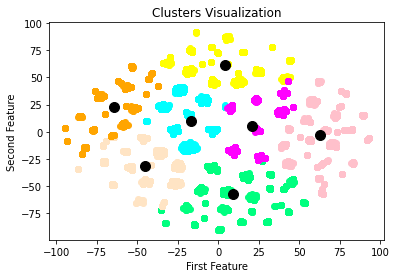

In [49]:
#Visualization of clusters

#"XCombined" will store all training instances and all testing instances appended at the end of training instances
XCombined=X_train.append(X_test)

#"CombinedTrueClusters" will store all predicted clusters of training instances and all predicted clusters of testing append at end of training instances
trainClusters=clustersTrain.tolist()
testClusters=clustersTest.tolist()
trainClusters.extend(testClusters)
CombinedTrueClusters=trainClusters

#Adding predicted cluster column to the Xcombined datframe
XCombined['Cluster Predicted']=CombinedTrueClusters

#Filter rows of original data cluster wise
filtered_label0 = XCombined.loc[XCombined['Cluster Predicted'] == 0]
filtered_label1 = XCombined.loc[XCombined['Cluster Predicted'] == 1]
filtered_label2 = XCombined.loc[XCombined['Cluster Predicted'] == 2]
filtered_label3 = XCombined.loc[XCombined['Cluster Predicted'] == 3]
filtered_label4 = XCombined.loc[XCombined['Cluster Predicted'] == 4]
filtered_label5 = XCombined.loc[XCombined['Cluster Predicted'] == 5]
filtered_label6 = XCombined.loc[XCombined['Cluster Predicted'] == 6]

#Evaluating centroids of each cluster
centroidList=[]
l0=filtered_label0.mean(axis=0)
centroidList.append([l0[0],l0[1]])

l1=filtered_label1.mean(axis=0)
centroidList.append(list([l1[0],l1[1]]))

l2=filtered_label2.mean(axis=0)
centroidList.append(list([l2[0],l2[1]]))

l3=filtered_label3.mean(axis=0)
centroidList.append(list([l3[0],l3[1]]))

l4=filtered_label4.mean(axis=0)
centroidList.append(list([l4[0],l4[1]]))

l5=filtered_label5.mean(axis=0)
centroidList.append(list([l5[0],l5[1]]))

l6=filtered_label6.mean(axis=0)
centroidList.append(list([l6[0],l6[1]]))

#Plotting the instances cluster wise
plt.scatter(filtered_label0.loc[:,0] , filtered_label0.loc[:,1] , color = 'yellow')
plt.scatter(filtered_label1.loc[:,0] , filtered_label1.loc[:,1] , color = 'springgreen')
plt.scatter(filtered_label2.loc[:,0] , filtered_label2.loc[:,1] , color = 'cyan')
plt.scatter(filtered_label3.loc[:,0] , filtered_label3.loc[:,1] , color = 'magenta')
plt.scatter(filtered_label4.loc[:,0] , filtered_label4.loc[:,1] , color = 'bisque')
plt.scatter(filtered_label5.loc[:,0] , filtered_label5.loc[:,1] , color = 'orange')
plt.scatter(filtered_label6.loc[:,0] , filtered_label6.loc[:,1] , color = 'pink')
#plt.scatter(centroids.loc[:,0] , centroids.loc[:,1] , color = 'black',s=100)

for eachCentroid in centroidList:
  plt.scatter(eachCentroid[0] , eachCentroid[1] , color = 'black',s=100)

plt.xlabel("First Feature")
plt.ylabel("Second Feature")
plt.title("Clusters Visualization")
print("Note: Cluster Centroids are represented by Black Markers")
plt.show()

In [52]:
#Displaying cluster co-ordinates
displayCentroids(centroidList)

         X Co-ordinate  Y Co-ordinate
Cluster                              
0             4.403891      61.450890
1             9.102703     -56.832657
2           -17.001537      10.042866
3            20.690870       5.741100
4           -45.495369     -31.436165
5           -64.283981      23.207308
6            62.880455      -3.049820


**Saving Best Model**

In [119]:
#Saving the model to disk
import pickle
filename = 'bestModelDmgAssignment3Q2.sav'
pickle.dump(gmm, open(filename, 'wb'))
 
# # some time later...
 
# # load the model from disk
# loaded_model = pickle.load(open(filename, 'rb'))
# result = loaded_model.predict(X_train)
# print(len(result))


In [152]:
#Splitting into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=9)
#Reseting index
X_train.reset_index(drop=True,inplace=True)
X_test.reset_index(drop=True,inplace=True)
y_train.reset_index(drop=True,inplace=True)
y_test.reset_index(drop=True,inplace=True)

In [155]:
y_test.to_csv('TrueLabelTestCSV.csv')

In [153]:
X_test.to_csv('testCSV.csv')